In [1]:
# # smooth with intervals
# https://james-brennan.github.io/posts/lowess_conf/
# https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html

# https://stackoverflow.com/questions/31104565/confidence-interval-for-lowess-in-python

# consider loess with bootstrap to get confidence intervals

# https://www.kaggle.com/code/eugeniyosetrov/lowess-smoother-algorithm

# https://github.com/cerlymarco/tsmoothie/blob/master/README.md

# https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html

# possibly the best
# https://james-brennan.github.io/posts/lowess_conf/



In [2]:
# En Limosa limosa y en Ardea cinerea no se ven muchos cambios (destacables) a lo largo del año... 
# Te mando también otras especies: Apus apus, es el vencejo, especie migratoria que está por aquí solo en verano. 
# Erithacus rubecula, el petirrojo, especie común a lo largo de todo el año en Euskadi. 
# Gallinago gallinago, la agachadiza, que es una especie ausente en Euskadi en verano, es sólo invernante en nuestras latitudes.


In [3]:
import pandas, numpy, seaborn

In [ ]:
import tsmoothie, tsmoothie.smoother

In [4]:
# import warnings
# warnings.filterwarnings('ignore')

In [5]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [6]:
input_file = 'Feno_Ornitho_LC_ADRIANO.xlsx'

# read information

In [7]:
%%time
df = pandas.read_excel(input_file)

CPU times: user 1min 30s, sys: 371 ms, total: 1min 31s
Wall time: 1min 32s


In [31]:
%%time
another_tab = pandas.read_excel(input_file, sheet_name='Especies')
working_species = list(set(another_tab['Especies']))
working_species.sort()
print(len(working_species), working_species[:10])

152 ['Accipiter nisus', 'Acrocephalus arundinaceus', 'Acrocephalus paludicola', 'Acrocephalus schoenobaenus', 'Acrocephalus scirpaceus', 'Alauda arvensis', 'Alca torda', 'Alcedo atthis', 'Anas acuta', 'Anas crecca']
CPU times: user 3.94 s, sys: 64.7 ms, total: 4 s
Wall time: 4.03 s


# analysis

In [12]:
species_specific_df = df[df['Nombre científico'] == 'Accipiter nisus']

In [18]:
slicing_rules = (species_specific_df['Quincena'] == 1) & (species_specific_df['Año'] == 2016)
ws = species_specific_df[slicing_rules]

In [25]:
listas_completas_IDs = ws['Lista ID'].values
listas_completas_count = len(list(set(listas_completas_IDs)))
listas_completas_count

2

In [29]:
slicing_rules = (df['Quincena'] == 1) & (df['Año'] == 2016)
across_species_df = df[slicing_rules]
across_species_listas_completas = across_species_df['Lista ID'].values
across_species_listas_completas_count = len(list(set(across_species_listas_completas)))
print(across_species_listas_completas_count)

54


In [45]:
inference

array([0.07292972, 0.06660093, 0.06210247, 0.06550161, 0.06930138,
       0.06960817, 0.05899732, 0.04316223, 0.02905163, 0.02091801,
       0.02082356, 0.02826647, 0.03977305, 0.05113877, 0.05944181,
       0.06511529, 0.06843849, 0.0719747 , 0.07451847, 0.07775817,
       0.07813314, 0.07583233, 0.07079216, 0.06470969])

Accipiter nisus
[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
	 Q 1
		 2 54 0.037037037037037035
		 12 138 0.08695652173913043
		 11 150 0.07333333333333333
		 9 118 0.07627118644067797
		 12 150 0.08
		 8 128 0.0625
		 12 99 0.12121212121212122
		 14 90 0.15555555555555556
	 Q 2
		 2 97 0.020618556701030927
		 12 120 0.1
		 9 167 0.05389221556886228
		 12 148 0.08108108108108109
		 13 171 0.07602339181286549
		 7 148 0.0472972972972973
		 2 134 0.014925373134328358
		 9 76 0.11842105263157894
	 Q 3
		 1 103 0.009708737864077669
		 9 101 0.0891089108910891
		 16 110 0.14545454545454545
		 12 225 0.05333333333333334
		 8 153 0.05228758169934641
		 5 142 0.035211267605633804
		 2 85 0.023529411764705882
		 14 92 0.15217391304347827
	 Q 4
		 3 84 0.03571428571428571
		 7 88 0.07954545454545454
		 5 127 0.03937007874015748
		 15 236 0.0635593220338983
		 15 151 0.09933774834437085
		 4 150 0.02666666666666667
		 2 105 0.01904761904761905
		 8 61 0.13114754098360656
	 Q 5
		 4 101 0.0396

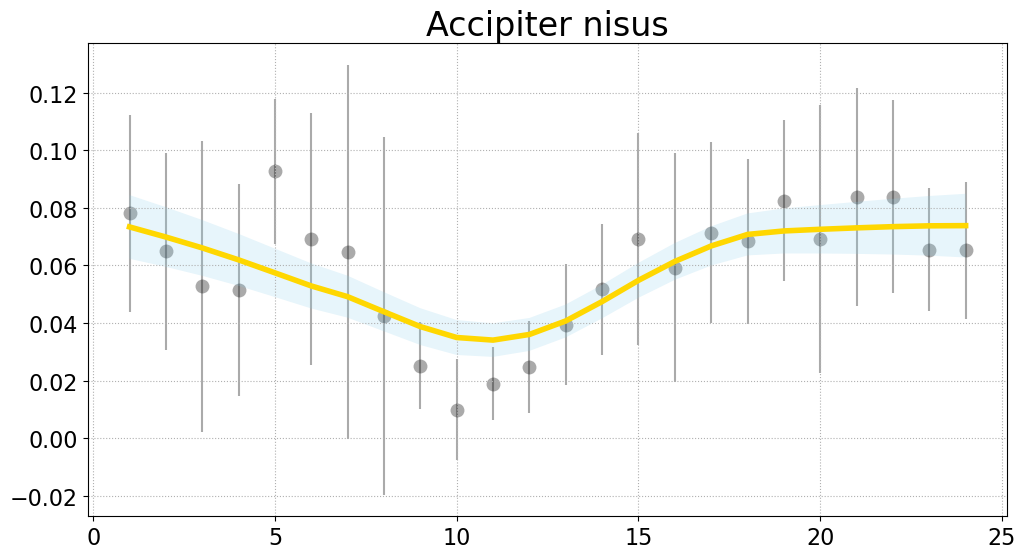

In [98]:
for species in working_species[:1]:
    
    print(species)
    species_specific_df = df[df['Nombre científico'] == species]

    years_measured = list(set(species_specific_df['Año']))
    years_measured.sort()
    print(years_measured)

    # making analysis and figure
    x=[]; y=[]; z=[]
    for fortnight in range(1, 24+1):
        print('\t', 'Q', fortnight)
        
        values_across_years = []
        for year_measured in years_measured:
            
            slicing_rules = (species_specific_df['Quincena'] == fortnight) & (species_specific_df['Año'] == year_measured)
            ws = species_specific_df[slicing_rules]
            listas_completas_IDs = ws['Lista ID'].values
            listas_completas_count = len(list(set(listas_completas_IDs)))

            slicing_rules = (df['Quincena'] == fortnight) & (df['Año'] == year_measured)
            across_species_df = df[slicing_rules]
            across_species_listas_completas = across_species_df['Lista ID'].values
            across_species_listas_completas_count = len(list(set(across_species_listas_completas)))

            # percentage
            percentage = listas_completas_count/across_species_listas_completas_count
            print('\t\t', listas_completas_count, across_species_listas_completas_count, percentage)
            values_across_years.append(percentage)

        # average over years
        average_over_years = numpy.median(values_across_years)
        sd = numpy.std(values_across_years)

        # add trajectory
        x.append(fortnight)
        y.append(average_over_years)
        z.append(sd)

    # smooth and plot
    print(x)
    print(y)
    #matplotlib.pyplot.plot(x, y, 'o', color='tab:red', zorder=9999)
    matplotlib.pyplot.errorbar(x, y, z, fmt='o', color='black', zorder=0, alpha=1/3, markeredgecolor='none', markersize=10)

    smoother = tsmoothie.smoother.LowessSmoother(smooth_fraction=0.5, iterations=6)
    #smoother = tsmoothie.smoother.GaussianSmoother(n_knots=6, sigma=0.1)
    # https://github.com/cerlymarco/tsmoothie/blob/master/notebooks/Basic%20Smoothing.ipynb
    
    smoother.smooth(y)
    low, up = smoother.get_intervals('confidence_interval')
    inference = smoother.smooth_data[0]

    matplotlib.pyplot.plot(x, inference, linewidth=4, color='gold')
    matplotlib.pyplot.fill_between(x, low[0], up[0], alpha=1/5, color='skyblue', edgecolors=None)

    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.title(species)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()
            
            

            
            
           
        
   
    

    print()

In [40]:
import tsmoothie, tsmoothie.smoother

In [ ]:
asdfas

In [ ]:
year_vector = []
for month_measured in range(1, 12+1):
    print('month', month_measured)
    medians_across_years = []
    for year_measured in years_measured:
        final_slice = species_specific_df[(species_specific_df['Año'] == year_measured) & (species_specific_df['Mes'] == month_measured)]
        values = final_slice['Número'].values
        observed_median = numpy.median(values)
        print('\t', 'year', year_measured, '#', len(values), values[:10], observed_median) 
        medians_across_years.append(observed_median)

    # average over years
    matplotlib.pyplot.scatter(numpy.repeat(month_measured, len(medians_across_years)), medians_across_years, s=100, c='black', alpha=1/3, edgecolors='none')

# close figure
matplotlib.pyplot.xlim([0.75, 12.25])
matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Observed')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [ ]:
x=[]; y=[]
for month_measured in range(1, 12+1):
    print('month', month_measured)
    medians_across_years = []
    for year_measured in years_measured:
        final_slice = species_specific_df[(species_specific_df['Año'] == year_measured) & (species_specific_df['Mes'] == month_measured)]
        values = final_slice['Número'].values
        observed_median = numpy.median(values)
        print('\t', 'year', year_measured, '#', len(values), values[:10], observed_median) 
        medians_across_years.append(observed_median)

    # average over years
    seaborn.stripplot(x=numpy.repeat(month_measured, len(medians_across_years)), y=medians_across_years, color='black', size=7.5, alpha=1/3)

# close figure
matplotlib.pyplot.xlim([0.75, 12.25])
matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Observed')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [ ]:
# confidence interval, https://www.geeksforgeeks.org/how-to-calculate-confidence-intervals-in-python/

In [ ]:
species_specific_df

In [ ]:
month_specific = mini[mini['Mes'] == 2]

In [ ]:
# get the median per month across years
years_measured = list(set(species_specific_df['Año']))
years_measured.sort()

years_measured

In [ ]:
for month_measured in range(1, 12+1):
    print(month_measured)